In [1]:
import pandas as pd

In [2]:
#Frecuencia de nombres de recien nacidos en los EEUU
names2010 = pd.read_csv("babynames/yob2017.txt", names=['names', 'sex', 'births'])
names2010.head()

,names,sex,births
0,Emma,F,19738
1,Olivia,F,18632
2,Ava,F,15902
3,Isabella,F,15100
4,Sophia,F,14831


In [3]:
#Births = cantidad de nacimientos en el año x.
#cantidad total de nacimientos agrupados por sexo.
names2010.groupby(by='sex').births.sum()

sex
F    1711811
M    1834490
Name: births, dtype: int64

In [4]:
#unir todos los datos de todos los años en un solo D.frame

years = range(1880, 2017)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

#concateno todo en un solo frame

names = pd.concat(pieces, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [5]:
#Numero de nacimientos por año.
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1880,90993,110491
1881,91953,100743
1882,107847,113686
1883,112319,104627
1884,129020,114442


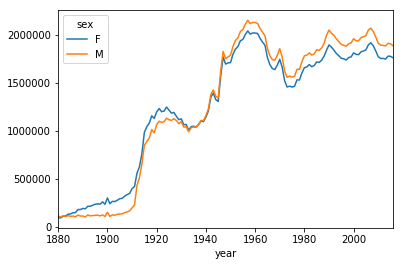

In [123]:
import matplotlib.pyplot as plt
total_births.plot()
#Visualización de nacimientos por sexo entre los 80 y 2017.

In [7]:
#agrego una columna donde me indica la fraccion de bebes
#que recibien el nombre en particular en dado año.
#0.0N = N de cada 100 bebes recibieron el nombre.

def add_prop(group):
    
    births = group.births.astype(float)
    
    group['prop'] = births/ births.sum()
    
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [8]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [9]:
#Control de sensatez en la columna 'prop'
#Verificacion de que las fracciones esten correctas en dado año.
#La suma de todas las fracciones en x años debe ser igual o muy cerca de 1.

import numpy as np
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [186]:
#Top 3 nombres de recien nacidos en cada años.
def get_top3(group):
    return group.sort_values(by='births', ascending=False)[:3]

grouped = names.groupby(['year', 'sex'])
top3 = grouped.apply(get_top3)

#Tendencia de nombres de los nacidos entre los 80' y 2017.

top3

name sex  births  year      prop
year sex                                              
1880 F   0            Mary   F    7065  1880  0.077643
         1            Anna   F    2604  1880  0.028618
         2            Emma   F    2003  1880  0.022013
     M   942          John   M    9655  1880  0.087383
         943       William   M    9532  1880  0.086269
         944         James   M    5927  1880  0.053642
1881 F   2000         Mary   F    6919  1881  0.075245
         2001         Anna   F    2698  1881  0.029341
         2002         Emma   F    2034  1881  0.022120
     M   2938         John   M    8769  1881  0.087043
         2939      William   M    8524  1881  0.084611
         2940        James   M    5441  1881  0.054009
1882 F   3935         Mary   F    8148  1882  0.075551
         3936         Anna   F    3143  1882  0.029143
         3937         Emma   F    2303  1882  0.021354
     M   4963         John   M    9557  1882  0.084065
         4964      William   M    9298  1882  0.081787
         4965        James   M    5892  1882  0.051827
1883 F   6062         Mary   F    8012  1883  0.071333
         6063         Anna   F    3306  1883  0.029434
         6064         Emma   F    2367  1883  0.021074
     M   7116         John   M    8894  1883  0.085007
         7117      William   M    8387  1883  0.080161
         7118        James   M    5223  1883  0.049920
1884 F   8146         Mary   F    9217  1884  0.071439
         8147         Anna   F    3860  1884  0.029918
         8148         Emma   F    2587  1884  0.020051
     M   9318         John   M    9388  1884  0.082033
         9319      William   M    8897  1884  0.077742
         9320        James   M    5693  1884  0.049746
...                    ...  ..     ...   ...       ...
2012 F   1725890    Sophia   F   22304  2012  0.012692
         1725891      Emma   F   20934  2012  0.011912
         1725892  Isabella   F   19093  2012  0.010865
     M   1745388     Jacob   M   19069  2012  0.010073
         1745389     Mason   M   18964  2012  0.010017
         1745390     Ethan   M   17668  2012  0.009333
2013 F   1759622    Sophia   F   21213  2013  0.012119
         1759623      Emma   F   20936  2013  0.011961
         1759624    Olivia   F   18414  2013  0.010520
     M   1778853      Noah   M   18241  2013  0.009667
         1778854     Jacob   M   18148  2013  0.009617
         1778855      Liam   M   18131  2013  0.009608
2014 F   1792891      Emma   F   20924  2014  0.011748
         1792892    Olivia   F   19791  2014  0.011112
         1792893    Sophia   F   18598  2014  0.010442
     M   1812072      Noah   M   19286  2014  0.010070
         1812073      Liam   M   18451  2014  0.009634
         1812074     Mason   M   17192  2014  0.008976
2015 F   1826119      Emma   F   20435  2015  0.011488
         1826120    Olivia   F   19669  2015  0.011057
         1826121    Sophia   F   17402  2015  0.009783
     M   1845193      Noah   M   19613  2015  0.010270
         1845194      Liam   M   18355  2015  0.009611
         1845195     Mason   M   16610  2015  0.008697
2016 F   1859217      Emma   F   19471  2016  0.011039
         1859218    Olivia   F   19327  2016  0.010957
         1859219       Ava   F   16283  2016  0.009231
     M   1878034      Noah   M   19082  2016  0.010101
         1878035      Liam   M   18198  2016  0.009633
         1878036   William   M   15739  2016  0.008332

[822 rows x 5 columns]

In [13]:
#pieces = []
#for year, group in names.groupby(['year', 'sex']):
#    pieces.append(group.sort_values(by='births', ascending=False)[:3])

#top3 = pd.concat(pieces, ignore_index=True)

#top3.head()